In [1]:
import numpy as np
import pandas as pd

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20250614/refs/heads/main/examples/gapminder.tsv",sep="\t")
df  # DataFrame

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [11]:
# 조건이 같은 데이터를 하나로 묶는 것 : 데이터베이스 group by : groupby
# 같은 년도끼리 묶는다.
df.groupby('year').lifeExp.min()
df.groupby('year').min()
df.groupby('year').max()
df.groupby('year').lifeExp.max()
df.groupby('year').gdpPercap.max()

year
1952    108382.35290
1957    113523.13290
1962     95458.11176
1967     80894.88326
1972    109347.86700
1977     59265.47714
1982     33693.17525
1987     31540.97480
1992     34932.91959
1997     41283.16433
2002     44683.97525
2007     49357.19017
Name: gdpPercap, dtype: float64

In [12]:
df
# 각 대륙별 나라의 최소 평균수명은
df.groupby(['continent','country']).lifeExp.min()
# 각년도별 대륙의 평균수명과 gdp의 최소값 출력하시오.
df.groupby(['year', 'continent'])[['lifeExp','gdpPercap']].min()
## 대륙에 대한 나라의 갯수
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

<Axes: xlabel='year'>

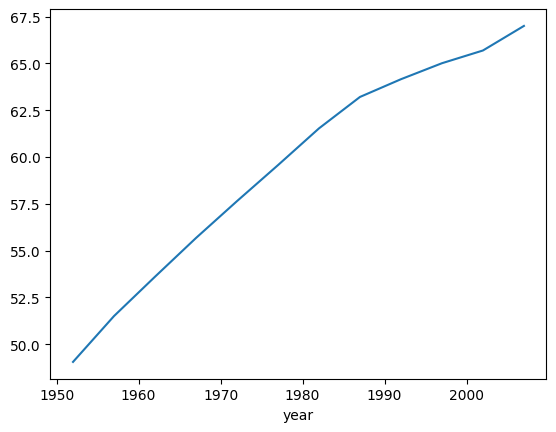

In [13]:
# 년도에 따른 평균수명의  평균의 추이를 확인
import matplotlib as plt
df.groupby('year')['lifeExp'].mean().plot()

<Axes: xlabel='year'>

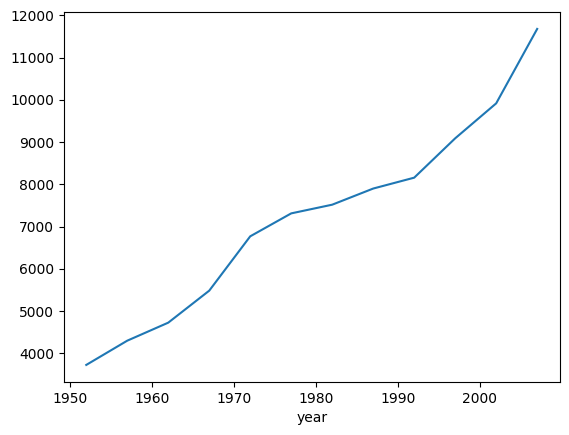

In [14]:
df.groupby('year')['gdpPercap'].mean().plot()

In [15]:
!pip install seaborn

In [16]:
import seaborn as sns
# 타이타닉 데이터셋 불러오기
df = sns.load_dataset('titanic')

In [17]:
# 생존률 분석
# 전체 생존률
print(df['survived'].value_counts(normalize=True))

# 성별에 따른 생존률
print(df.groupby('sex')['survived'].mean())

# 등급(pclass)별 생존률
print(df.groupby('pclass')['survived'].mean())

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [19]:
# 가족 수로 혼자인지 여부 추가
df['family_size'] = df['sibsp'] + df['parch']
df['alone'] = df['family_size'] == 0

# 혼자 탄 사람들의 생존률
print(df.groupby('alone')['survived'].mean())

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64


In [20]:
# 성인 남자인지 여부
df['adult_male'] = (df['age'] >= 18) & (df['sex'] == 'male')

# 성인 남성과 나머지의 생존률
print(df.groupby('adult_male')['survived'].mean())

adult_male
False    0.548387
True     0.177215
Name: survived, dtype: float64


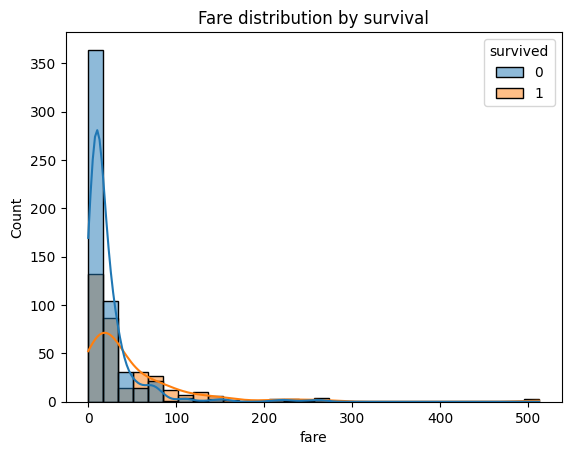

In [22]:
import matplotlib.pyplot as plt
# 요금(fare)과 생존 관계
# 요금 분포와 생존 여부 시각화
sns.histplot(data=df, x='fare', hue='survived', bins=30, kde=True)
plt.title("Fare distribution by survival")
plt.show()

In [23]:
# 나이대별 생존률
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

print(df.groupby('age_group')['survived'].mean())

age_group
Child         0.579710
Teen          0.428571
YoungAdult    0.382682
Adult         0.400000
Senior        0.227273
Name: survived, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12624\726139566.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['survived'].mean())


| 나이 그룹   | 생존률    | 설명         |
| ------- | ------ | ---------- |
| **어린이** | 57.97% | 12세 이하     |
| **청소년** | 42.86% | 13세 \~ 18세 |
| **청년**  | 38.27% | 19세 \~ 35세 |
| **중년**  | 40.00% | 36세 \~ 60세 |
| **노년층** | 22.73% | 61세 이상     |


In [32]:
# agg()는 그룹별로 여러 가지 집계 함수들을 한 번에 적용할 수 있는 
df.groupby('continent')['lifeExp'].agg(['mean', 'max', 'min'])

,mean,max,min
continent,,,
Africa,48.865330,76.442,23.599
Americas,64.658737,80.653,37.579
Asia,60.064903,82.603,28.801
Europe,71.903686,81.757,43.585
Oceania,74.326208,81.235,69.120


In [33]:
df.groupby('continent')['lifeExp'].agg(
    평균='mean',
    최대='max',
    표준편차='std'
)

,평균,최대,표준편차
continent,,,
Africa,48.865330,76.442,9.150210
Americas,64.658737,80.653,9.345088
Asia,60.064903,82.603,11.864532
Europe,71.903686,81.757,5.433178
Oceania,74.326208,81.235,3.795611


In [34]:
df.groupby('continent').agg({
    'lifeExp': ['mean', 'min', 'max'],
    'gdpPercap': ['mean', 'std'],
    'pop': 'sum'
})

lifeExp                     gdpPercap                        pop
                mean     min     max          mean           std          sum
continent                                                                    
Africa     48.865330  23.599  76.442   2193.754578   2827.929863   6187585961
Americas   64.658737  37.579  80.653   7136.110356   6396.764112   7351438499
Asia       60.064903  28.801  82.603   7902.150428  14045.373112  30507333901
Europe     71.903686  43.585  81.757  14469.475533   9355.213498   6181115304
Oceania    74.326208  69.120  81.235  18621.609223   6358.983321    212992136